In [1]:
# 필요한 모듈 임포트

import pandas as pd
import numpy as np
from datetime import datetime

import folium as f
from bs4 import BeautifulSoup
import urllib.request as REQ

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

### 쓰레기 배출량 데이터

- 서울 열린데이터 광장: 서울시 생활폐기물 발생량 
``` ** 19년도까지 데이터 존재 ```
- 18, 19년 각각 파일 다운 (엑셀)

In [2]:
# 18년도 데이터 read
# '재활용'쓰레기 배출량이 필요해서 해당 컬럼만 추출

trash18 = pd.read_excel('data/서울시생활폐기물발생량_18.xls')
trash18.drop(index=[0,1,2], inplace=True)

trash18[['기간','구분','재활용.1']]

,기간,구분,재활용.1
3,2018,종로구,133.9
4,2018,중구,126.7
5,2018,용산구,118.9
6,2018,성동구,94.7
7,2018,광진구,168.2
8,2018,동대문구,208.3
9,2018,중랑구,192.9
10,2018,성북구,155.8
11,2018,강북구,79.5
12,2018,도봉구,109.8


In [3]:
# '재활용.1' 된 컬럼 때문에 컬럼명 재설정
trash18 =trash18[['기간','구분','재활용.1']]
trash18.columns=['기간','구분','재활용']

trash18.head()

,기간,구분,재활용
3,2018,종로구,133.9
4,2018,중구,126.7
5,2018,용산구,118.9
6,2018,성동구,94.7
7,2018,광진구,168.2


In [4]:
# 타입이 object 라 추후 분석위해 int로 변경

trash18[['기간','재활용']] = trash18[['기간','재활용']].astype('int64')

In [5]:
# 19년도 데이터 read

trash19 = pd.read_excel('data/서울시생활폐기물발생량_19.xls')
trash19.drop(index=[0,1,2], inplace=True)

trash19.head()

,기간,컬럼1,발생량,재활용,재활용.1,재활용.2,소각,매립,기타
3,2019,종로구,339.9,219.6,124.5,95.1,79.9,40.3,0.1
4,2019,중구,413.7,224.3,136.5,87.8,133.9,55.5,-
5,2019,용산구,305.2,198.6,127.8,70.8,69.3,31.3,6
6,2019,성동구,303.1,211.4,136.8,74.6,62.6,27.1,2
7,2019,광진구,333.9,253.2,158.7,94.5,59.1,21.2,0.4


In [6]:
trash19 = trash19[['기간','컬럼1','재활용.1']]
trash19.columns=['기간','구분','재활용']

In [7]:
trash19[['기간','재활용']] = trash19[['기간','재활용']].astype('int64')

In [8]:
trash19.head()

,기간,구분,재활용
3,2019,종로구,124
4,2019,중구,136
5,2019,용산구,127
6,2019,성동구,136
7,2019,광진구,158


In [9]:
# 18, 19년도 데이터 합치기
trash = pd.concat([trash18, trash19])

# 기간/구분 단위 멀티인덱스 설정
trash.set_index(['기간','구분'], inplace=True)

In [10]:
trash.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 50 entries, (2018, '종로구') to (2019, '강동구')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   재활용     50 non-null     int64
dtypes: int64(1)
memory usage: 1.5+ KB


### 인구 데이터 
- 18, 19년도 데이터 추출
- 18년도, 19년도 파일 따로 다운 (엑셀)
- 서울 열린데이터 광장 https://data.seoul.go.kr/dataList/419/S/2/datasetView.do

In [11]:
# 엑셀파일 읽어오기, 불필요한 행 skip
df=pd.read_excel('data/서울시 주민등록인구 통계.xls',skiprows=[0,1,2]) 

df

,2018,합계,4263868,10049607,4910849,5138758,9765623,4773899,4991724,283984,136950,147034,2.29,1416131
0,2018,종로구,73735,163026,79156,83870,153065,74825,78240,9961,4331,5630,2.08,26742
1,2018,중구,61502,135633,66674,68959,125725,61947,63778,9908,4727,5181,2.04,22005
2,2018,용산구,108974,245090,119766,125324,228999,110640,118359,16091,9126,6965,2.10,37640
3,2018,성동구,137209,316463,155091,161372,308221,151359,156862,8242,3732,4510,2.25,42767
4,2018,광진구,162606,371063,179527,191536,355559,172794,182765,15504,6733,8771,2.19,45619
5,2018,동대문구,161820,364338,179774,184564,348052,173567,174485,16286,6207,10079,2.15,57165
6,2018,중랑구,180511,408147,202448,205699,403209,200419,202790,4938,2029,2909,2.23,61830
7,2018,성북구,186601,447687,216495,231192,435868,211904,223964,11819,4591,7228,2.34,67782
8,2018,강북구,143395,322915,157522,165393,319164,156071,163093,3751,1451,2300,2.23,58196
9,2018,도봉구,138087,341649,167043,174606,339413,166160,173253,2236,883,1353,2.46,55964


In [12]:
# 컬럼명 수정
# '기간, 자치구' 기준 인덱스 설정

df.columns=['기간','자치구','세대','인구합계','남자합계','여자합계','한국인계','한국인남자','한국인여자','외국인계','외국인남자',
            '외국인여자','세대당인구','65세이상고령자']
df.set_index(['기간','자치구'],inplace=True)

In [13]:
df.head()

세대    인구합계    남자합계    여자합계    한국인계   한국인남자   한국인여자   외국인계  \
기간   자치구                                                                  
2018 종로구   73735  163026   79156   83870  153065   74825   78240   9961   
     중구    61502  135633   66674   68959  125725   61947   63778   9908   
     용산구  108974  245090  119766  125324  228999  110640  118359  16091   
     성동구  137209  316463  155091  161372  308221  151359  156862   8242   
     광진구  162606  371063  179527  191536  355559  172794  182765  15504   

          외국인남자  외국인여자  세대당인구  65세이상고령자  
기간   자치구                                 
2018 종로구   4331   5630   2.08     26742  
     중구    4727   5181   2.04     22005  
     용산구   9126   6965   2.10     37640  
     성동구   3732   4510   2.25     42767  
     광진구   6733   8771   2.19     45619

In [14]:
df.info() # 데이터 타입 확인

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 51 entries, (2018, '종로구') to (2019, '강동구')
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   세대        51 non-null     int64  
 1   인구합계      51 non-null     int64  
 2   남자합계      51 non-null     int64  
 3   여자합계      51 non-null     int64  
 4   한국인계      51 non-null     int64  
 5   한국인남자     51 non-null     int64  
 6   한국인여자     51 non-null     int64  
 7   외국인계      51 non-null     int64  
 8   외국인남자     51 non-null     int64  
 9   외국인여자     51 non-null     int64  
 10  세대당인구     51 non-null     float64
 11  65세이상고령자  51 non-null     int64  
dtypes: float64(1), int64(11)
memory usage: 6.4+ KB


## 지도 시각화를 위한 데이터 로드

In [15]:
# 지도 시각화 위해 서울의 동별 위경도 파일 read

seoul = pd.read_excel('data/행정_법정동 중심좌표.xlsx')

seoul = seoul[seoul['시도'] == '서울특별시'][['시도','시군구','위도','경도']]

In [16]:
seoul.head()

,시도,시군구,위도,경도
0,서울특별시,종로구,37.584009,126.970626
1,서울특별시,종로구,37.575408,126.965944
2,서울특별시,종로구,37.590758,126.980996
3,서울특별시,종로구,37.594768,126.965574
4,서울특별시,종로구,37.613029,126.974485


In [17]:
# 피벗테이블 평균값으로 서울시 위경도 추출

seoul_ll = seoul.pivot_table(index='시도')
seoul_ll[['위도','경도']]

,위도,경도
시도,,
서울특별시,37.553207,126.988081


In [18]:
# 피벗테이블 시도/ 시군구 기준 평균값으로 서울시 구별 위경도 추출

seoul_ll2 = seoul.pivot_table(index=['시도','시군구'])

In [19]:
# 지도그리기 위한 구별 위경도 데이터

geo_path = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

## 배출량과 인구합계 데이터 확인
```
가설: 인구수가 많은 지역구일수록 1인당 플라스틱 배출량이 많을 것이다.
```

### 1인당 플라스틱 쓰레기 배출량 계산 
- 재활용쓰레기량 / 인구합계

In [20]:
# 18년도 데이터 
# 톤 단위 쓰레기 배출량이라 kg 으로 수정
td_18 = (trash.loc[2018,'재활용']*1000)/df.loc[2018,'인구합계'] 

In [21]:
td_18.nlargest(n=10)

구분
중구      0.928977
종로구     0.815821
동대문구    0.570898
마포구     0.522830
서초구     0.490685
용산구     0.481456
중랑구     0.470419
금천구     0.456655
광진구     0.452753
노원구     0.415937
dtype: float64

In [22]:
# 19년도 데이터
# 톤 단위 쓰레기 배출량이라 kg 으로 수정
td_19 = (trash.loc[2019,'재활용']*1000)/df.loc[2019,'인구합계'] 

In [23]:
td_19.nlargest(n=10)

중구      0.996425
종로구     0.766052
동대문구    0.564703
금천구     0.536097
용산구     0.517976
강서구     0.478043
중랑구     0.462659
성동구     0.440159
광진구     0.430551
관악구     0.427190
dtype: float64

### 1인 쓰레기 배출량 지도

In [24]:
#  서울시의 지도 설정

m = f.Map(location=[seoul_ll['위도'], seoul_ll['경도']],  zoom_start=11)

In [25]:
result_data = pd.read_csv('data/result.csv', encoding='cp949')

result_data.head()

,index,기간,자치구,인구합계,세대당인구,65세미만비율,한국인비율,재활용,1인당재활용배출량,주거지비율,상업비율
0,0,2018,종로구,163026,2.08,83.596482,93.89,133,0.815821,33.546963,12.252724
1,1,2018,중구,135633,2.04,83.776072,92.69,126,0.928977,57.798508,39.218002
2,2,2018,용산구,245090,2.10,84.642376,93.43,118,0.481456,51.710346,5.757379
3,3,2018,성동구,316463,2.25,86.485940,97.40,94,0.297033,57.623325,2.815597
4,4,2018,광진구,371063,2.19,87.705861,95.82,168,0.452753,61.352592,1.181005


In [26]:
# '기간/자치구' 기준 멀티인덱스 설정 후 지도

result_data.set_index(['기간','자치구'], inplace=True)

In [27]:
# 2018년 재활용 배출량 기준으로 높은곳이 진하게 표시되도록 함

f.Choropleth(
    geo_data=geo_path, 
    name = '플라스틱 배출량', 
    data=result_data.loc[2018,'1인당재활용배출량'], 
    fill_color='OrRd',
    key_on='feature.properties.name',
    fill_opacity=0.7,
    line_opacity=0.3,
    highlight=True,
#     color = 'gray',
    ).add_to(m)

In [28]:
m

### 자치구별 인구수 추출

In [29]:
# 2018년 인구합계 
df_18 = df.loc[2018,'인구합계']
df_18.nlargest(n=10)

자치구
송파구    673507
강서구    603611
노원구    548160
강남구    547453
관악구    520040
은평구    487666
양천구    468145
성북구    447687
구로구    438486
서초구    438163
Name: 인구합계, dtype: int64

In [30]:
# 2019년 인구합계 
df_19 = df.loc[2019,'인구합계']
df_19.nlargest(n=10)

자치구
합계     10010983
송파구      682741
강서구      598273
강남구      550209
노원구      537303
관악구      517334
은평구      484546
양천구      462285
성북구      454744
강동구      440390
Name: 인구합계, dtype: int64

In [31]:
m1 = f.Map(location=[seoul_ll['위도'], seoul_ll['경도']],  zoom_start=11)

In [32]:
# 2018년 재활용 배출량 기준으로 높은곳이 진하게 표시되도록 함

f.Choropleth(
    geo_data=geo_path, 
    name = '플라스틱 배출량', 
    data=result_data.loc[2018,'인구합계'], 
    fill_color='OrRd',
    key_on='feature.properties.name',
    fill_opacity=0.7,
    line_opacity=0.3,
    highlight=True,
#     color = 'gray',
    ).add_to(m1)

In [33]:
m1

### 데이터프레임 형태로 합치기
- 18년,19년도 1인당 재활용 배출량과 인구합계 데이터병합

In [34]:
result = pd.DataFrame([td_18,td_19,df_18,df_19]) # 쓰레기배출량과 인구수 데이터를 합침

result = result.T # 데이터를 컬럼별로 확인하기위해 행렬변환
print(result.shape)

(26, 4)


In [35]:
result.columns = ['plastic_18','plastic_19','pop_18','pop_19'] # 컬럼 재설정

In [36]:
result.drop(index='합계', inplace=True) # 불필요한 인덱스 제거

In [37]:
print(result.shape)
result.head()

(25, 4)


,plastic_18,plastic_19,pop_18,pop_19
종로구,0.815821,0.766052,163026.0,161869.0
중구,0.928977,0.996425,135633.0,136488.0
용산구,0.481456,0.517976,245090.0,245185.0
성동구,0.297033,0.440159,316463.0,308979.0
광진구,0.452753,0.430551,371063.0,366972.0


In [38]:
# 상관분석

result.corr()

,plastic_18,plastic_19,pop_18,pop_19
plastic_18,1.000000,0.842494,-0.611955,-0.606777
plastic_19,0.842494,1.000000,-0.644056,-0.637131
pop_18,-0.611955,-0.644056,1.000000,0.999306
pop_19,-0.606777,-0.637131,0.999306,1.000000


- -0.6의 음의 상관관계 도출
- 인구가 적을수록 1인당 배출량이 많다는 결론
=>가설기각 다른 원인 분석 필요

### 다른 원인 분석을 위한 컬럼추가
- 한국인비율
``` 가설: 한국인이 많을수록 (배달량이 많아) 플라스틱 배출량이 많을것이다.```

In [39]:
df['한국인비율'] = (df['한국인계']/df['인구합계'] *100).round(2)

In [40]:
df[['한국인계','인구합계','한국인비율']].head()

한국인계    인구합계  한국인비율
기간   자치구                       
2018 종로구  153065  163026  93.89
     중구   125725  135633  92.69
     용산구  228999  245090  93.43
     성동구  308221  316463  97.40
     광진구  355559  371063  95.82

In [41]:
kor_top6 = df.nlargest(n=6, columns='한국인비율')['한국인비율']
kor_top6

기간    자치구
2018  도봉구    99.35
2019  도봉구    99.32
2018  노원구    99.20
2019  노원구    99.18
2018  양천구    99.15
2019  양천구    99.11
Name: 한국인비율, dtype: float64

- 65세미만 
``` 가설: 65세미만의 연령대에서 배달, 커피등의 원인으로 플라스틱 배출이 많을 것이다.```

In [42]:
df['65세미만'] = df['인구합계']-df['65세이상고령자']
df['65세미만비율'] = df['65세미만']/df['인구합계']*100

In [43]:
df[['65세이상고령자','인구합계','65세미만','65세미만비율']].head()

65세이상고령자    인구합계   65세미만    65세미만비율
기간   자치구                                     
2018 종로구     26742  163026  136284  83.596482
     중구      22005  135633  113628  83.776072
     용산구     37640  245090  207450  84.642376
     성동구     42767  316463  273696  86.485940
     광진구     45619  371063  325444  87.705861

In [44]:
df.reset_index(inplace=True)

df

,기간,자치구,세대,인구합계,남자합계,여자합계,한국인계,한국인남자,한국인여자,외국인계,외국인남자,외국인여자,세대당인구,65세이상고령자,한국인비율,65세미만,65세미만비율
0,2018,종로구,73735,163026,79156,83870,153065,74825,78240,9961,4331,5630,2.08,26742,93.89,136284,83.596482
1,2018,중구,61502,135633,66674,68959,125725,61947,63778,9908,4727,5181,2.04,22005,92.69,113628,83.776072
2,2018,용산구,108974,245090,119766,125324,228999,110640,118359,16091,9126,6965,2.10,37640,93.43,207450,84.642376
3,2018,성동구,137209,316463,155091,161372,308221,151359,156862,8242,3732,4510,2.25,42767,97.40,273696,86.485940
4,2018,광진구,162606,371063,179527,191536,355559,172794,182765,15504,6733,8771,2.19,45619,95.82,325444,87.705861
5,2018,동대문구,161820,364338,179774,184564,348052,173567,174485,16286,6207,10079,2.15,57165,95.53,307173,84.309899
6,2018,중랑구,180511,408147,202448,205699,403209,200419,202790,4938,2029,2909,2.23,61830,98.79,346317,84.851046
7,2018,성북구,186601,447687,216495,231192,435868,211904,223964,11819,4591,7228,2.34,67782,97.36,379905,84.859511
8,2018,강북구,143395,322915,157522,165393,319164,156071,163093,3751,1451,2300,2.23,58196,98.84,264719,81.977920
9,2018,도봉구,138087,341649,167043,174606,339413,166160,173253,2236,883,1353,2.46,55964,99.35,285685,83.619446


In [45]:
trash.reset_index(inplace=True)
trash.columns = ['기간','자치구','재활용']

trash

,기간,자치구,재활용
0,2018,종로구,133
1,2018,중구,126
2,2018,용산구,118
3,2018,성동구,94
4,2018,광진구,168
5,2018,동대문구,208
6,2018,중랑구,192
7,2018,성북구,155
8,2018,강북구,79
9,2018,도봉구,109


- 세대당인구 ```가설 세대당인구가 적은(1인가구 비율이 높은) 지역에서 플라스틱 배출량이 많을 것```

In [46]:
# 새로운 컬럼 추가

result2 = df[['기간','자치구','인구합계','세대당인구','65세미만비율','한국인비율']]

print(result2.shape)
result2.head()

(51, 6)


,기간,자치구,인구합계,세대당인구,65세미만비율,한국인비율
0,2018,종로구,163026,2.08,83.596482,93.89
1,2018,중구,135633,2.04,83.776072,92.69
2,2018,용산구,245090,2.10,84.642376,93.43
3,2018,성동구,316463,2.25,86.485940,97.40
4,2018,광진구,371063,2.19,87.705861,95.82


## 자료 합쳐서 분석

In [47]:
# 위 인구관련 데이터에 재활용배출량 데이터 합치기

# pd.concat([result2,trash],axis=1)

In [48]:
# result2.info() # 데이터 타입 확인

In [49]:
# 기간, 자치구 기준으로 데이터 합치기

result3 = pd.merge(result2,trash,on=['기간','자치구'])
result3.head()

,기간,자치구,인구합계,세대당인구,65세미만비율,한국인비율,재활용
0,2018,종로구,163026,2.08,83.596482,93.89,133
1,2018,중구,135633,2.04,83.776072,92.69,126
2,2018,용산구,245090,2.10,84.642376,93.43,118
3,2018,성동구,316463,2.25,86.485940,97.40,94
4,2018,광진구,371063,2.19,87.705861,95.82,168


In [50]:
result3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   기간       50 non-null     int64  
 1   자치구      50 non-null     object 
 2   인구합계     50 non-null     int64  
 3   세대당인구    50 non-null     float64
 4   65세미만비율  50 non-null     float64
 5   한국인비율    50 non-null     float64
 6   재활용      50 non-null     int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 3.1+ KB


In [51]:
result3.head()

,기간,자치구,인구합계,세대당인구,65세미만비율,한국인비율,재활용
0,2018,종로구,163026,2.08,83.596482,93.89,133
1,2018,중구,135633,2.04,83.776072,92.69,126
2,2018,용산구,245090,2.10,84.642376,93.43,118
3,2018,성동구,316463,2.25,86.485940,97.40,94
4,2018,광진구,371063,2.19,87.705861,95.82,168


In [52]:
# 1인당재활용배출량 컬럼 추가

result3['1인당재활용배출량'] = result3['재활용']*1000/result3['인구합계']

In [53]:
# 기간/자치구 기준 멀티인덱스 설정

result4 = result3.set_index(['기간','자치구'])

In [54]:
# 상관관계 파악

result4.corr()

,인구합계,세대당인구,65세미만비율,한국인비율,재활용,1인당재활용배출량
인구합계,1.000000,0.512752,0.562169,0.604395,0.442112,-0.624477
세대당인구,0.512752,1.000000,0.354690,0.633012,-0.077597,-0.545887
65세미만비율,0.562169,0.354690,1.000000,0.165597,0.311953,-0.299028
한국인비율,0.604395,0.633012,0.165597,1.000000,0.349075,-0.376374
재활용,0.442112,-0.077597,0.311953,0.349075,1.000000,0.314354
1인당재활용배출량,-0.624477,-0.545887,-0.299028,-0.376374,0.314354,1.000000


- 재활용배출량과 전반적 음의 상관관계
- 65세 미만, 한국인 비율과 관계가 없음
- 인구합계가 음의 상관관계가 가장 높다.

## 1인당 재활용배출량 시각화

### 연도별 자치구 별 1인당 재활용배출량 시각화

<AxesSubplot:xlabel='자치구', ylabel='1인당재활용배출량'>

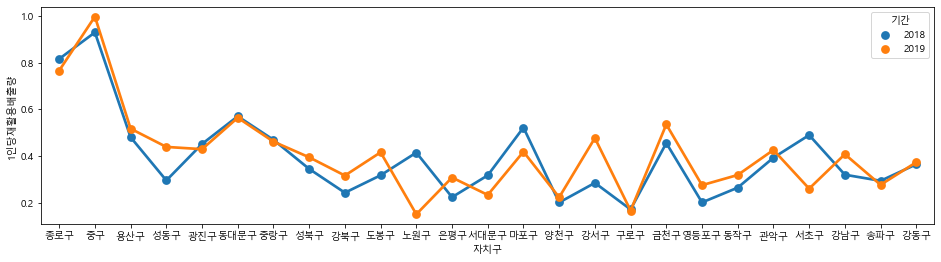

In [55]:
plt.figure(figsize = (16, 4))
sns.pointplot(data = result3, x = "자치구", y = "1인당재활용배출량", hue = "기간")

In [56]:
r = result3.query("자치구 == '종로구' or 자치구 == '중구'")['1인당재활용배출량'].sum() / result3['1인당재활용배출량'].sum() *100

In [57]:
result_list = [r, 100-r]
name_list = ['종로구/중구','다른 자치구(총 23개 구)']
sliceColors = ['#EF2D35', '#E6FDF5']

([<matplotlib.patches.Wedge at 0x1b3e555fca0>,
 [Text(1.108576398514297, 0.6790127897595679, '종로구/중구'),
  Text(-0.9380261833582512, -0.5745492836427113, '다른 자치구(총 23개 구)')],
 [Text(0.6822008606241825, 0.4178540244674264, '17.5%'),
  Text(-0.5116506454681369, -0.3133905183505698, '82.5%')])

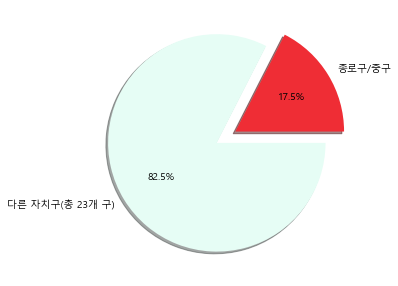

In [58]:
plt.figure( figsize=[5,5])

plt.pie(result_list, labels=name_list, autopct='%.1f%%', shadow=True, explode=[0.2,0], colors=sliceColors) 

- 종로구와 중구에서 배출량이 압도적으로 많음

### 연도/지역구 별 세대당인구 시각화

<AxesSubplot:xlabel='자치구', ylabel='세대당인구'>

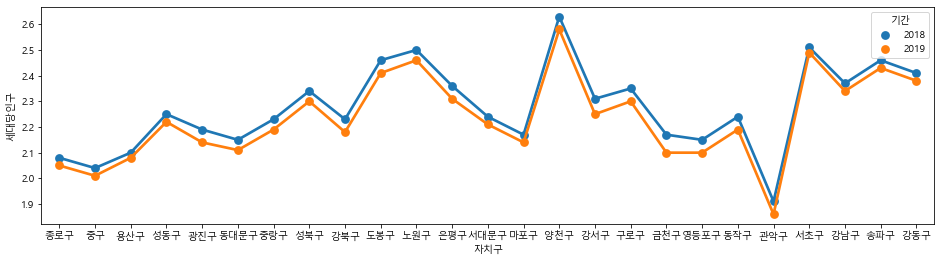

In [59]:
plt.figure(figsize = (16, 4))
sns.pointplot(data = result3, x = "자치구", y = "세대당인구", hue = "기간")

- 가장 낮은 관악구를 제외하고, 종로구와 중구에서 세대당인구가 낮음

### 세대당인구 지도

In [60]:
m2 = f.Map(location=[seoul_ll['위도'], seoul_ll['경도']],  zoom_start=11)

In [61]:
# 세대당인구가 많을수록 진하게 표시되도록 함
f.Choropleth(
    geo_data=geo_path, 
    data=result_data.loc[2018,'세대당인구'], 
    fill_color='BuGn',
    key_on='feature.properties.name',
    fill_opacity=0.7,
    line_opacity=0.3,
    highlight=True,
#     color = 'gray',
    ).add_to(m2)

In [62]:
m2

- 종로구와 중구에서 세대당인구가 적게 나타남 

### scatterplot 상으로 관계 시각화

<AxesSubplot:xlabel='인구합계', ylabel='1인당재활용배출량'>

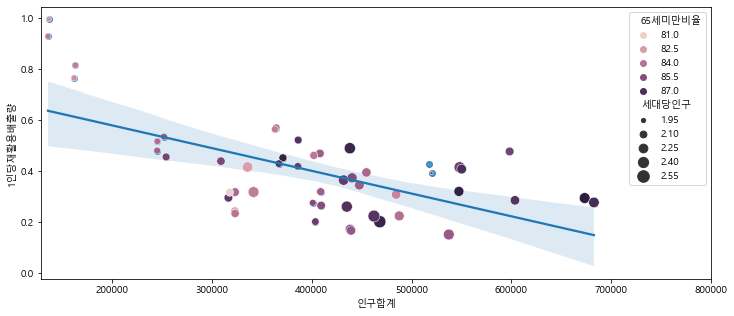

In [63]:
plt.figure(figsize = (12, 5))
plt.xlim(129000,800000)
sns.regplot(x='인구합계', y='1인당재활용배출량', data=result4)
sns.scatterplot(data=result4, x = "인구합계", y = "1인당재활용배출량", size = "세대당인구", sizes = (0, 150), hue = "65세미만비율")

- 음의 상관관계 그래프
- 배출량이 높은 지역은 인구/ 65세미만 비율/ 세대당인구 가 낮은 것을 확인

## 1인배출량이 많은 '종로구/중구' 특성파악

### 주거지역/ 상업지역 용도 데이터 추가
- 서울 열린데이터 광장 : 서울시 용도지역 현황 통계
- https://data.seoul.go.kr/dataList/244/S/2/datasetView.do

'충정로','서울역','회현','시청','명동','을지로3가','을지로4가','을지로입구','충무로','동대문역사문화공원',
          '동대입구','신당','청구','약수','버티고개','경복궁','광화문','종각','안국','종로3가','종로5가','동대문',
          '창신','동묘앞','혜화','독립문'

In [64]:
# 엑셀파일 read 및 총계/ 주거지역/ 상업지역 컬럼 추출

store=pd.read_excel('data/서울시용도지역현황.xls')

store[['기간','자치구','구분','구분.5','구분.11']]

,기간,자치구,구분,구분.5,구분.11
0,기간,자치구,용도지역총합계,주거지역,상업지역
1,기간,자치구,용도지역총합계,일반주거지역,소계
2,기간,자치구,용도지역총합계,일반주거지역 계,소계
3,2018,서울특별시,605598289,306969692,25501150
4,2018,종로구,23972507,8042048,2937285
5,2018,중구,9974292,5764992,3911718
6,2018,용산구,21898766,11323928,1260795
7,2018,성동구,16804426,9683269,473145
8,2018,광진구,17075115,10476026,201658
9,2018,동대문구,14245433,12483322,828159


In [65]:
store = store[['기간','자치구','구분','구분.5','구분.11']]

In [66]:
# 컬럼명 재설정

store.columns = ['기간','자치구','총계','주거지역','상업지역']
store

,기간,자치구,총계,주거지역,상업지역
0,기간,자치구,용도지역총합계,주거지역,상업지역
1,기간,자치구,용도지역총합계,일반주거지역,소계
2,기간,자치구,용도지역총합계,일반주거지역 계,소계
3,2018,서울특별시,605598289,306969692,25501150
4,2018,종로구,23972507,8042048,2937285
5,2018,중구,9974292,5764992,3911718
6,2018,용산구,21898766,11323928,1260795
7,2018,성동구,16804426,9683269,473145
8,2018,광진구,17075115,10476026,201658
9,2018,동대문구,14245433,12483322,828159


In [67]:
store.drop(index=[0,1,2,3],inplace=True) # 불필요한 행 제거

In [68]:
# 주거지비율/ 상업비율 컬럼 추가

store['주거지비율']=store['주거지역']/store['총계']*100
store['상업비율']=store['상업지역']/store['총계']*100

store.head()

,기간,자치구,총계,주거지역,상업지역,주거지비율,상업비율
4,2018,종로구,23972507,8042048,2937285,33.546963,12.252724
5,2018,중구,9974292,5764992,3911718,57.798508,39.218002
6,2018,용산구,21898766,11323928,1260795,51.710348,5.757379
7,2018,성동구,16804426,9683269,473145,57.623325,2.815598
8,2018,광진구,17075115,10476026,201658,61.352594,1.181005


In [69]:
# '기간','자치구' 기준 멀티인덱스 설정

store.set_index(['기간','자치구'])

총계       주거지역      상업지역      주거지비율       상업비율
기간   자치구                                                        
2018 종로구     23972507    8042048   2937285  33.546963  12.252724
     중구       9974292    5764992   3911718  57.798508  39.218002
     용산구     21898766   11323928   1260795  51.710348   5.757379
     성동구     16804426    9683269    473145  57.623325   2.815598
     광진구     17075115   10476026    201658  61.352594   1.181005
     동대문구    14245433   12483322    828159  87.630344   5.813505
     중랑구     18531520    9992764    357442  53.923067   1.928833
     성북구     24621422   16254133    397229  66.016224   1.613347
     강북구     23636019   10552450    270342  44.645632   1.143771
     도봉구     20679052    7669111    258659  37.086376   1.250826
     노원구     35595942   13519476    589023  37.980386   1.654748
     은평구     29788522   13572775    510002  45.563775   1.712076
     서대문구    17685973   14739290    283546   83.33887   1.603225
     마포구     23890251   12581051    940188  52.661862   3.935446
     양천구     17469613   12201316    796830  69.843081   4.561234
     강서구     41462497   13750000   1321659  33.162499   3.187601
     구로구     20136328    9898054    513589  49.155208   2.550559
     금천구     13012685    5571845    149622  42.818565   1.149817
     영등포구    24354829    7068067   2607260  29.021214   10.70531
     동작구     16387882   13546850    344623  82.663824   2.102914
     관악구     29563482   14622686    390187  49.461988   1.319828
     서초구     46899887   17839919   1320064  38.038298   2.814642
     강남구     39497268   23376592   1875445  59.185339    4.74829
     송파구     33858375   20064119   2283335  59.258954   6.743782
     강동구     24556203   12375609    679345  50.397079    2.76649
2019 서울특별시  605598289  306901357  25591941  50.677382   4.225894
     종로구     23972507    8042329   2937285  33.548135  12.252724
     중구       9974292    5764992   3911718  57.798508  39.218002
     용산구     21898766   11323928   1260795  51.710348   5.757379
     성동구     16804426    9683269    473145  57.623325   2.815598
     광진구     17075115   10472838    203281  61.333924    1.19051
     동대문구    14245433   12480000    828159  87.607025   5.813505
     중랑구     18531520    9991886    357442  53.918329   1.928833
     성북구     24621422   16276610    397229  66.107514   1.613347
     강북구     23636019   10548072    270342  44.627109   1.143771
     도봉구     20679052    7666000    258659  37.071332   1.250826
     노원구     35595942   13518019    590480  37.976292   1.658841
     은평구     29788522   13573323    518072  45.565614   1.739167
     서대문구    17685973   14739290    283546   83.33887   1.603225
     마포구     23890251   12581051    940188  52.661862   3.935446
     양천구     17469613   12201316    796830  69.843081   4.561234
     강서구     41462497   13746521   1323788  33.154108   3.192736
     구로구     20136328    9898054    513589  49.155208   2.550559
     금천구     13012685    5571845    149622  42.818565   1.149817
     영등포구    24354829    7067386   2607260  29.018418   10.70531
     동작구     16387882   13553523    344623  82.704544   2.102914
     관악구     29563482   14622501    392024  49.461363   1.326041
     서초구     46899887   17837801   1322182  38.033782   2.819158
     강남구     39497268   23303938   1946139  59.001392   4.927275
     송파구     33858375   20062608   2284846  59.254492   6.748245
     강동구     24556203   12374257    680697  50.391573   2.771996

In [70]:
# 데이터 타입 체크
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 4 to 54
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기간      51 non-null     object
 1   자치구     51 non-null     object
 2   총계      51 non-null     object
 3   주거지역    51 non-null     object
 4   상업지역    51 non-null     object
 5   주거지비율   51 non-null     object
 6   상업비율    51 non-null     object
dtypes: object(7)
memory usage: 3.2+ KB


In [71]:
# 데이터가 모두 object 이므로 형태변환

store[['기간','주거지역','상업지역','주거지비율','상업비율']] 
= store[['기간','주거지역','상업지역','주거지비율','상업비율']].astype('float32')

In [72]:
store.head()

,기간,자치구,총계,주거지역,상업지역,주거지비율,상업비율
4,2018.0,종로구,23972507,8042048.0,2937285.0,33.546963,12.252724
5,2018.0,중구,9974292,5764992.0,3911718.0,57.798508,39.218002
6,2018.0,용산구,21898766,11323928.0,1260795.0,51.710346,5.757379
7,2018.0,성동구,16804426,9683269.0,473145.0,57.623325,2.815598
8,2018.0,광진구,17075115,10476026.0,201658.0,61.352592,1.181005


In [73]:
# '기간','자치구' 기준 기존 데이터와 병합

result5 = pd.merge(result3, store[['기간','자치구','주거지비율','상업비율']], on=['기간','자치구'])
result5

,기간,자치구,인구합계,세대당인구,65세미만비율,한국인비율,재활용,1인당재활용배출량,주거지비율,상업비율
0,2018,종로구,163026,2.08,83.596482,93.89,133,0.815821,33.546963,12.252724
1,2018,중구,135633,2.04,83.776072,92.69,126,0.928977,57.798508,39.218002
2,2018,용산구,245090,2.10,84.642376,93.43,118,0.481456,51.710346,5.757379
3,2018,성동구,316463,2.25,86.485940,97.40,94,0.297033,57.623325,2.815598
4,2018,광진구,371063,2.19,87.705861,95.82,168,0.452753,61.352592,1.181005
5,2018,동대문구,364338,2.15,84.309899,95.53,208,0.570898,87.630348,5.813505
6,2018,중랑구,408147,2.23,84.851046,98.79,192,0.470419,53.923069,1.928833
7,2018,성북구,447687,2.34,84.859511,97.36,155,0.346224,66.016220,1.613347
8,2018,강북구,322915,2.23,81.977920,98.84,79,0.244646,44.645630,1.143771
9,2018,도봉구,341649,2.46,83.619446,99.35,109,0.319041,37.086376,1.250826


### 상업비율 지도

In [74]:
m3 = f.Map(location=[seoul_ll['위도'], seoul_ll['경도']],  zoom_start=11)

In [75]:
# 상업비율이 높을수록 진하게 표시되도록 함
f.Choropleth(
    geo_data=geo_path, 
    data=result_data.loc[2018,'상업비율'], 
    fill_color='OrRd',
    key_on='feature.properties.name',
    legend_name='상업비율',
    highlight=True,
    fill_opacity=0.7,
    line_opacity=0.3
#     color = 'gray',
    ).add_to(m3)

In [76]:
m3

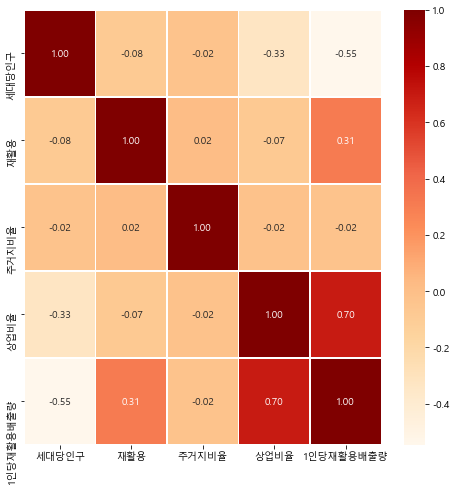

In [118]:
# 해당 데이터 상관관계 히트맵

result55 =result5[['세대당인구','재활용','주거지비율','상업비율','1인당재활용배출량']]
plt.figure(figsize=(8,8))
sns.heatmap(data = result55.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='OrRd')
plt.show()

In [78]:
result5.reset_index(inplace=True)

In [79]:
result5.to_csv('data/result.csv',index=False, encoding='cp949')

#### 재활용배출량과 상업비율 상관계수 0.7 => 데이터 시각화

<AxesSubplot:xlabel='상업비율', ylabel='1인당재활용배출량'>

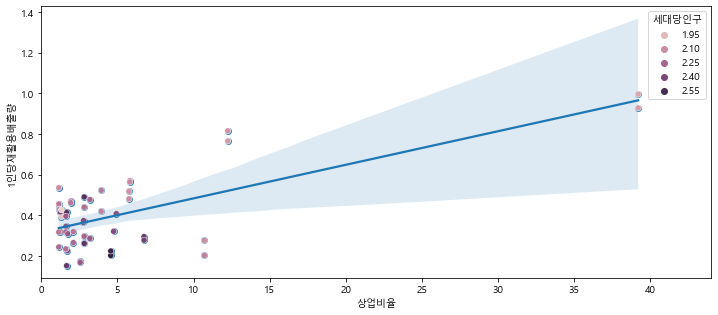

In [80]:
plt.figure(figsize = (12, 5))
plt.xlim(0,44)
sns.regplot(x='상업비율', y='1인당재활용배출량', data=result5)
sns.scatterplot(data=result5, x = "상업비율", y = "1인당재활용배출량", hue = "세대당인구")

- 상업비율이 높은 지역에서 1인당 배출량이 높다.

# 재활용품 자동수거기 위치 선정
- 자동수거기 현재 설치된 장소 확인
- 지하철 기준 유동인구 확인

### 자판기 설치장소 : 크롤링

In [81]:
list1=[]
for i in range(1,4):
    turl = f'https://www.superbin.co.kr/new/contents/location_list.php?skey=09&sval=&pg={i}'    
    response = REQ.urlopen(turl)
    soup = BeautifulSoup( response, 'html.parser')
#     soup
    sel = '#nep_location > ul'
    ul = soup.select_one(sel)
#     ul.select('li')
    for li in ul.select('li'):
        list1.append({'장소명':li.select_one('.lc_point').text,
                    '주소':li.select_one('.lc_adress').text})
        print('장소명: ',li.select_one('.lc_point').text)
        print('주소: ', li.select_one('.lc_adress').text) 
    print('========================') # 페이지 마지막에 출력

장소명:  세븐일레븐 이태원중앙점 (투명페트병)
주소:  서울 용산구 회나무로26길 3 라인빌 
                            

장소명:  신당5동 다산어린이공원
주소:  서울특별시 중구 신당동 123-1 
                            

장소명:  도봉구 창5동주민센터(투명페트병/캔)
주소:  서울 도봉구 도봉로136나길 20 
                            

장소명:  강서구 강서구청 후문 주차장(투명페트병/캔) 
주소:  서울 강서구 화곡로 302 강서구청 
                            

장소명:  동작구 상도4동 주민센터(투명페트병/캔)
주소:  서울 동작구 양녕로27길 44 
                            

장소명:  동작구 노량진2동 주민센터(투명페트병/캔)
주소:  서울 동작구 장승배기로19길 48 노량진2동 주민센터 
                            

장소명:  동작구 상도3동 주민센터(투명페트병/캔)
주소:  서울 동작구 성대로2길 11 상도3동 주민센터 
                            

장소명:  강동구 강동구민회관(투명페트병/캔)
주소:  서울 강동구 상암로 168 강동구민회관 
                            

장소명:  양천구 목3동 시장지원센터
주소:  서울특별시 양천구 목동중앙북로6길 5 
                            

장소명:  양천구 목3동 행정복지센터 정문 
주소:  서울 양천구 목동중앙남로16나길 55 목3동주민센터 
                            

장소명:  송파구 소리공원(투명페트병/캔)
주소:  서울특별시 송파구 문정동 319-1 
                            

장소명:  송파구 석촌호수(서호) 아뜰리에 화장실(투명페트병/캔)
주소:  서울특별시 송파구 석촌호수로 191 
        

In [82]:
# 크롤링 데이터 확인(포인트형)
df1=pd.DataFrame(list1)
df1

,장소명,주소
0,세븐일레븐 이태원중앙점 (투명페트병),서울 용산구 회나무로26길 3 라인빌 \n ...
1,신당5동 다산어린이공원,서울특별시 중구 신당동 123-1 \n ...
2,도봉구 창5동주민센터(투명페트병/캔),서울 도봉구 도봉로136나길 20 \n ...
3,강서구 강서구청 후문 주차장(투명페트병/캔),서울 강서구 화곡로 302 강서구청 \n ...
4,동작구 상도4동 주민센터(투명페트병/캔),서울 동작구 양녕로27길 44 \n \n
5,동작구 노량진2동 주민센터(투명페트병/캔),서울 동작구 장승배기로19길 48 노량진2동 주민센터 \n ...
6,동작구 상도3동 주민센터(투명페트병/캔),서울 동작구 성대로2길 11 상도3동 주민센터 \n ...
7,강동구 강동구민회관(투명페트병/캔),서울 강동구 상암로 168 강동구민회관 \n ...
8,양천구 목3동 시장지원센터,서울특별시 양천구 목동중앙북로6길 5 \n ...
9,양천구 목3동 행정복지센터 정문,서울 양천구 목동중앙남로16나길 55 목3동주민센터 \n ...


In [83]:
list2=[]

turl2 = 'https://www.superbin.co.kr/new/contents/location_list.php?scode1=03'    
response = REQ.urlopen(turl2)
soup = BeautifulSoup( response, 'html.parser')
# soup
sel = '#nep_location > ul'
ul = soup.select_one(sel)
# ul.select('li')
for li in ul.select('li'):
    list2.append({'장소명':li.select_one('.lc_point').text,
                '주소':li.select_one('.lc_adress').text})
    print('장소명: ',li.select_one('.lc_point').text)
    print('주소: ', li.select_one('.lc_adress').text) 
print('========================') # 페이지 마지막에 출력

장소명:  서울시 미양중학교
주소:  서울 강북구 인수봉로 39 미양중.고등학교 
                            

장소명:  인천시 계양고등학교
주소:  인천 계양구 계양문화로 177 계양고등학교 
                            

장소명:  나주시 나주상업고등학교
주소:  전남 나주시 함박산길 23-4 
                            

장소명:  서울시 오디세이학교
주소:  서울 종로구 종로58길 30 
                            

장소명:  부산시 모덕초등학교
주소:  부산 사상구 덕상로 120 모덕초등학교 
                            

장소명:  서울시 목운중학교
주소:  서울 양천구 목동동로 235 목운초.중학교 
                            

장소명:  서울시 성남중학교
주소:  서울 동작구 대방동길 74 
                            

장소명:  서울시 국사봉중학교
주소:  서울 동작구 양녕로20길 20 국사봉중학교 
                            

장소명:  서울시 연가초등학교
주소:  서울 서대문구 증가로12가길 49-50 
                            



In [84]:
# 크롤링 데이터 확인(슈퍼루키)
df2=pd.DataFrame(list2)
df2

,장소명,주소
0,서울시 미양중학교,서울 강북구 인수봉로 39 미양중.고등학교 \n ...
1,인천시 계양고등학교,인천 계양구 계양문화로 177 계양고등학교 \n ...
2,나주시 나주상업고등학교,전남 나주시 함박산길 23-4 \n \n
3,서울시 오디세이학교,서울 종로구 종로58길 30 \n \n
4,부산시 모덕초등학교,부산 사상구 덕상로 120 모덕초등학교 \n ...
5,서울시 목운중학교,서울 양천구 목동동로 235 목운초.중학교 \n ...
6,서울시 성남중학교,서울 동작구 대방동길 74 \n \n
7,서울시 국사봉중학교,서울 동작구 양녕로20길 20 국사봉중학교 \n ...
8,서울시 연가초등학교,서울 서대문구 증가로12가길 49-50 \n ...


In [85]:
# 서울에 설치된 슈퍼루키만
df2=df2[df2['주소'].str.contains('서울')]
df2  

,장소명,주소
0,서울시 미양중학교,서울 강북구 인수봉로 39 미양중.고등학교 \n ...
3,서울시 오디세이학교,서울 종로구 종로58길 30 \n \n
5,서울시 목운중학교,서울 양천구 목동동로 235 목운초.중학교 \n ...
6,서울시 성남중학교,서울 동작구 대방동길 74 \n \n
7,서울시 국사봉중학교,서울 동작구 양녕로20길 20 국사봉중학교 \n ...
8,서울시 연가초등학교,서울 서대문구 증가로12가길 49-50 \n ...


In [86]:
# 데이터 합치고 주소 뒤에 공백 제거. 인덱스 다시 배열
data = pd.concat([df1,df2])

data['주소']=data['주소'].str.rstrip()

data = data.reset_index()

data.drop(columns='index',inplace=True)

data

,장소명,주소
0,세븐일레븐 이태원중앙점 (투명페트병),서울 용산구 회나무로26길 3 라인빌
1,신당5동 다산어린이공원,서울특별시 중구 신당동 123-1
2,도봉구 창5동주민센터(투명페트병/캔),서울 도봉구 도봉로136나길 20
3,강서구 강서구청 후문 주차장(투명페트병/캔),서울 강서구 화곡로 302 강서구청
4,동작구 상도4동 주민센터(투명페트병/캔),서울 동작구 양녕로27길 44
5,동작구 노량진2동 주민센터(투명페트병/캔),서울 동작구 장승배기로19길 48 노량진2동 주민센터
6,동작구 상도3동 주민센터(투명페트병/캔),서울 동작구 성대로2길 11 상도3동 주민센터
7,강동구 강동구민회관(투명페트병/캔),서울 강동구 상암로 168 강동구민회관
8,양천구 목3동 시장지원센터,서울특별시 양천구 목동중앙북로6길 5
9,양천구 목3동 행정복지센터 정문,서울 양천구 목동중앙남로16나길 55 목3동주민센터


In [87]:
data.to_csv('tList.csv',encoding='cp949',index=False) # 위도, 경도 얻기 위해 csv파일로 내보내기

In [88]:
## 위도 경도 구글 스프레드시트(geocode by awesome table)로 추가한 데이터 불러오기

tmlist=pd.read_csv('data/tmlist.csv')

In [89]:
lat =tmlist['위도'].mean()
lng =tmlist['경도'].mean()
map = f.Map( location=(lat,lng) ,zoom_start=11)

In [90]:
for x,y,z in tmlist[['위도','경도','장소명']].values:    
    mk = f.Marker(location=(x, y), popup=z)
    mk.add_to(map)


In [91]:
f.Choropleth(
    geo_data=geo_path, 
    name = '플라스틱 배출량', 
    data=result_data.loc[2018,'1인당재활용배출량'], 
    fill_color='OrRd',
    key_on='feature.properties.name',
    fill_opacity=0.7,
    line_opacity=0.3,
    highlight=True,
#     color = 'gray',
    ).add_to(map)

In [92]:
map

# 위치 선정을 위한 지하철역 기준 유동인구 파악
- 중구, 종로구의 주거비율은 낮고, 상업비율이 높음.
- 유동인구가 많은 지하철역이 적합할 것.

In [93]:
j_sub = ['충정로','서울역','회현','시청','명동','을지로3가','을지로4가','을지로입구','충무로','동대문역사문화공원',
          '동대입구','신당','청구','약수','버티고개','경복궁','광화문','종각','안국','종로3가','종로5가','동대문',
          '창신','동묘앞','혜화','독립문']

# 지하철역 기준 유동인구 파악

### 18년도 지하철 승하차 인원수

In [94]:
sub18=pd.read_excel('data/subway18.xlsx')
sub18.set_index(['역명'],inplace=True)
sub18

,연도,기관,호선,합계_승차인원,합계_하차인원,1월_승차인원,1월_하차인원,2월_승차인원,2월_하차인원,3월_승차인원,...,8월_승차인원,8월_하차인원,9월_승차인원,9월_하차인원,10월_승차인원,10월_하차인원,11월_승차인원,11월_하차인원,12월_승차인원,12월_하차인원
역명,,,,,,,,,,,,,,,,,,,,,
신설동,2018,서울메트로,"1,2호선",7343269,7157830,567796,554445,509736,494978,642090,...,596915,583187,584101,566438,659814,642989,651117,632930,600909,581433
종로3가,2018,서울메트로,"1,3,5호선",20798826,21003131,1643444,1652244,1421435,1440696,1679820,...,1758555,1777189,1697102,1711298,1861843,1862830,1886619,1888943,1830299,1854085
동대문,2018,서울메트로,"1,4호선",14330661,14958245,1089833,1134127,992139,1034044,1251361,...,1119116,1163597,1140778,1189061,1317084,1374574,1246892,1307558,1166098,1215962
서울역,2018,서울메트로,"1,4호선",24603884,27022870,1856603,2025643,1767006,1954104,1992608,...,2095030,2255700,2009607,2190587,2276890,2468280,2290346,2475130,2062959,2259271
시청,2018,서울메트로,"1,5호선",17610663,17167784,1375458,1331848,1231475,1192769,1439168,...,1461579,1414613,1389899,1355091,1628967,1592735,1660913,1616721,1492258,1428599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
신흥,2018,서울도시철도공사,8호선,1536425,1635133,121263,130381,98946,106825,118416,...,143855,154058,132782,139973,130277,139283,142232,151585,146486,156257
암사,2018,서울도시철도공사,8호선,6102294,5359058,480688,426788,381854,338277,468211,...,551764,488882,522699,459756,533745,472503,590274,517292,576395,508743
잠실(8),2018,서울도시철도공사,8호선,4860399,5662051,380441,432814,305174,352633,335806,...,477702,543026,411927,484058,419570,496136,464437,548388,516870,600511


In [95]:
sub18['승하차인원']=sub18['합계_승차인원']+sub18['합계_하차인원']
sub18.head()

,연도,기관,호선,합계_승차인원,합계_하차인원,1월_승차인원,1월_하차인원,2월_승차인원,2월_하차인원,3월_승차인원,...,8월_하차인원,9월_승차인원,9월_하차인원,10월_승차인원,10월_하차인원,11월_승차인원,11월_하차인원,12월_승차인원,12월_하차인원,승하차인원
역명,,,,,,,,,,,,,,,,,,,,,
신설동,2018,서울메트로,"1,2호선",7343269,7157830,567796,554445,509736,494978,642090,...,583187,584101,566438,659814,642989,651117,632930,600909,581433,14501099
종로3가,2018,서울메트로,"1,3,5호선",20798826,21003131,1643444,1652244,1421435,1440696,1679820,...,1777189,1697102,1711298,1861843,1862830,1886619,1888943,1830299,1854085,41801957
동대문,2018,서울메트로,"1,4호선",14330661,14958245,1089833,1134127,992139,1034044,1251361,...,1163597,1140778,1189061,1317084,1374574,1246892,1307558,1166098,1215962,29288906
서울역,2018,서울메트로,"1,4호선",24603884,27022870,1856603,2025643,1767006,1954104,1992608,...,2255700,2009607,2190587,2276890,2468280,2290346,2475130,2062959,2259271,51626754
시청,2018,서울메트로,"1,5호선",17610663,17167784,1375458,1331848,1231475,1192769,1439168,...,1414613,1389899,1355091,1628967,1592735,1660913,1616721,1492258,1428599,34778447


### 중구,종로구에 위치한 지하철역과 18년도 승하차인원수

In [96]:
subway18=sub18.loc[j_sub,['연도','승하차인원']]
subway18

,연도,승하차인원
역명,,
충정로,2018,11262203
서울역,2018,51626754
회현,2018,22248580
시청,2018,34778447
명동,2018,29073529
을지로3가,2018,22745092
을지로4가,2018,12296122
을지로입구,2018,35277519
충무로,2018,23075033


#### 중구,종로구 18년도 승하차인원수 top5

In [97]:
subway18.nlargest(n=5, columns=['승하차인원'],keep='all')

,연도,승하차인원
역명,,
서울역,2018,51626754
종로3가,2018,41801957
을지로입구,2018,35277519
시청,2018,34778447
동대문역사문화공원,2018,32230348


### 19년도 지하철 승하차 인원수

In [98]:
sub19=pd.read_excel('data/subway19.xlsx')
sub19.set_index(['역명'],inplace=True)

sub19

,연도,기관,호선,합계_승차인원,합계_하차인원,1월_승차인원,1월_하차인원,2월_승차인원,2월_하차인원,3월_승차인원,...,8월_승차인원,8월_하차인원,9월_승차인원,9월_하차인원,10월_승차인원,10월_하차인원,11월_승차인원,11월_하차인원,12월_승차인원,12월_하차인원
역명,,,,,,,,,,,,,,,,,,,,,
시청,2019,서울메트로,"1,2호선",17793691,17495033,1493204,1460438,1213901,1176548,1568472,...,698567,681302,1377435,1343837,1739037,1741267,1645520,1619127,1694198,1640422
종로3가,2019,서울메트로,"1,3,5호선",21730233,21966040,1969179,1998114,1608484,1643598,1957339,...,1107476,1117103,1659129,1667359,1953393,1962874,1869788,1868281,1983924,2002081
서울역,2019,서울메트로,"1,4호선",24413251,26855274,2082730,2234423,1834644,2006707,2205522,...,951491,1082868,1951331,2151596,2218017,2446479,2219916,2457509,2252477,2495602
동대문,2019,서울메트로,"1,4호선",13705591,14240946,1148958,1191532,999443,1039580,1286804,...,490305,510544,1074787,1116380,1252101,1297809,1204710,1251213,1242247,1302026
동묘앞,2019,서울메트로,"1,6호선",7332561,7625620,602976,623267,537187,559435,688340,...,412658,422337,584614,609909,666626,695082,636728,663583,634792,657125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
남한산성입구,2019,서울도시철도공사,8호선,5243710,4785771,415399,371618,309232,276087,469077,...,400503,355964,429040,397848,479761,444681,466015,431034,448432,406931
단대오거리,2019,서울도시철도공사,8호선,4067805,3802012,333055,321727,249808,239775,365082,...,315345,298994,326780,299430,363385,333098,349643,322283,346697,323193
신흥,2019,서울도시철도공사,8호선,1771622,1901045,146885,157193,112591,121687,150024,...,149454,161358,138297,149052,153125,165556,151856,164429,159245,170689


In [99]:
sub19['승하차인원']=sub19['합계_승차인원']+sub19['합계_하차인원']
sub19.head()

,연도,기관,호선,합계_승차인원,합계_하차인원,1월_승차인원,1월_하차인원,2월_승차인원,2월_하차인원,3월_승차인원,...,8월_하차인원,9월_승차인원,9월_하차인원,10월_승차인원,10월_하차인원,11월_승차인원,11월_하차인원,12월_승차인원,12월_하차인원,승하차인원
역명,,,,,,,,,,,,,,,,,,,,,
시청,2019,서울메트로,"1,2호선",17793691,17495033,1493204,1460438,1213901,1176548,1568472,...,681302,1377435,1343837,1739037,1741267,1645520,1619127,1694198,1640422,35288724
종로3가,2019,서울메트로,"1,3,5호선",21730233,21966040,1969179,1998114,1608484,1643598,1957339,...,1117103,1659129,1667359,1953393,1962874,1869788,1868281,1983924,2002081,43696273
서울역,2019,서울메트로,"1,4호선",24413251,26855274,2082730,2234423,1834644,2006707,2205522,...,1082868,1951331,2151596,2218017,2446479,2219916,2457509,2252477,2495602,51268525
동대문,2019,서울메트로,"1,4호선",13705591,14240946,1148958,1191532,999443,1039580,1286804,...,510544,1074787,1116380,1252101,1297809,1204710,1251213,1242247,1302026,27946537
동묘앞,2019,서울메트로,"1,6호선",7332561,7625620,602976,623267,537187,559435,688340,...,422337,584614,609909,666626,695082,636728,663583,634792,657125,14958181


### 중구,종로구에 위치한 지하철역과 19년도 승하차인원수

In [100]:
subway19=sub19.loc[j_sub,['연도','승하차인원']]
subway19

,연도,승하차인원
역명,,
충정로,2019,11046197
서울역,2019,51268525
회현,2019,21696545
시청,2019,35288724
명동,2019,27582890
을지로3가,2019,23540657
을지로4가,2019,12528575
을지로입구,2019,34795017
충무로,2019,21925230


#### 중구,종로구 19년도 승하차인원수 top5

In [101]:
subway19.nlargest(n=5, columns=['승하차인원'],keep='all')

,연도,승하차인원
역명,,
서울역,2019,51268525
종로3가,2019,43696273
시청,2019,35288724
을지로입구,2019,34795017
동대문역사문화공원,2019,31665340


## 18년도 19년도 전체 지하철역 승하차인원수 top20

In [102]:
sub18_20=sub18[['승하차인원']].nlargest(n=20, columns=['승하차인원'])
sub18_20.rename(columns={'승하차인원':'18년도 승하차인원수'}, inplace=True) # 18년도 top20

In [103]:
sub19_20=sub19[['승하차인원']].nlargest(n=20, columns=['승하차인원'])
sub19_20.rename(columns={'승하차인원':'19년도 승하차인원수'}, inplace=True) # 19년도 top20

In [104]:
sub1819_20=pd.concat([sub18_20,sub19_20],axis=1)
sub1819_20

,18년도 승하차인원수,19년도 승하차인원수
역명,,
강남,72890132,69455928
잠실,62774215,58836157
홍대입구,59130782,57788638
서울역,51626754,51268525
신림,49607870,47906108
구로디지털단지,44421344,43333322
고속터미널,43386532,41758883
신도림,42720103,40713052
삼성,42706392,41712287


<AxesSubplot:xlabel='역명', ylabel='승하차인원수'>

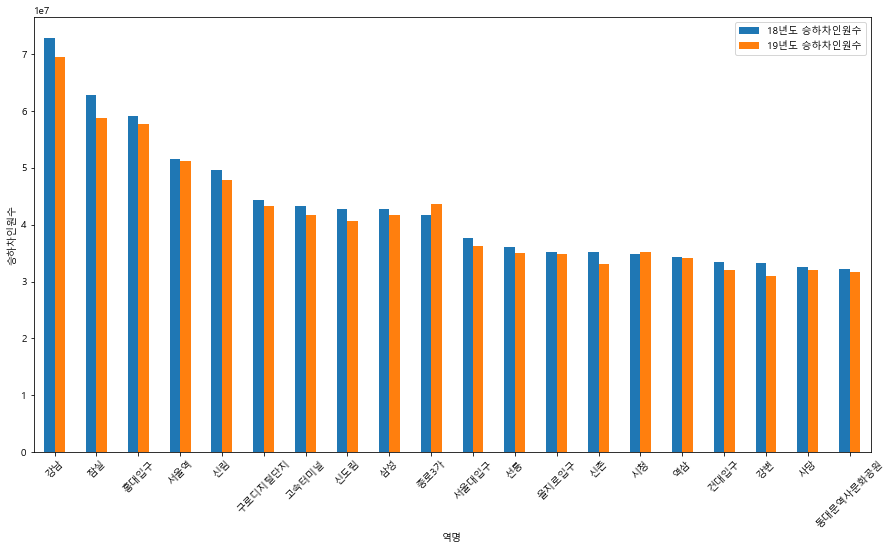

In [105]:
sub1819_20.plot(kind = 'bar',ylabel='승하차인원수',figsize = (15, 8),rot=45 )

### 전체에서 종로구/중구 지하철역의 비율

In [106]:
sub19_T = sub19[['승하차인원']].T

In [107]:
total = sub19_T.sum(axis=1)

In [108]:
jj_total = sub19_T[j_sub].sum(axis=1)

In [109]:
jj_total/total*100

승하차인원    16.247074
dtype: float64

#### 지하철역 데이터 병합

In [110]:
subway1819=pd.concat([subway18,subway19],axis=0)
subway1819

,연도,승하차인원
역명,,
충정로,2018,11262203
서울역,2018,51626754
회현,2018,22248580
시청,2018,34778447
명동,2018,29073529
을지로3가,2018,22745092
을지로4가,2018,12296122
을지로입구,2018,35277519
충무로,2018,23075033


In [111]:
subway1819.index

Index(['충정로', '서울역', '회현', '시청', '명동', '을지로3가', '을지로4가', '을지로입구', '충무로',
       '동대문역사문화공원', '동대입구', '신당', '청구', '약수', '버티고개', '경복궁', '광화문', '종각', '안국',
       '종로3가', '종로5가', '동대문', '창신', '동묘앞', '혜화', '독립문', '충정로', '서울역', '회현',
       '시청', '명동', '을지로3가', '을지로4가', '을지로입구', '충무로', '동대문역사문화공원', '동대입구', '신당',
       '청구', '약수', '버티고개', '경복궁', '광화문', '종각', '안국', '종로3가', '종로5가', '동대문',
       '창신', '동묘앞', '혜화', '독립문'],
      dtype='object', name='역명')

In [112]:
subway1819=subway1819.reset_index() # 그래프를 그리기위해 설정한 인덱스를 컬럼으로 되돌리기

### 18년도 19년도 역별 승하차인원수
- 18년도와 19년도의 승하차수가 거의 일치

<AxesSubplot:xlabel='역명', ylabel='승하차인원'>

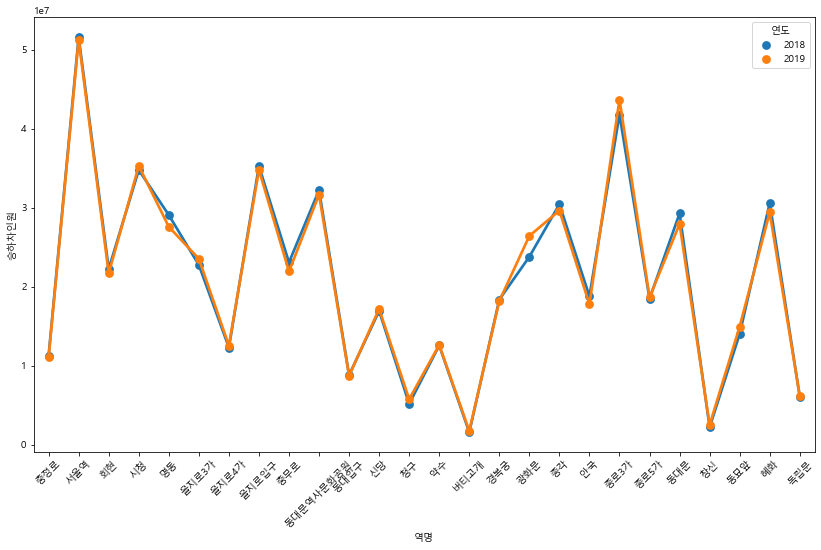

In [113]:
plt.figure(figsize = (14, 8))
plt.xticks(rotation = 45 )
sns.pointplot(data = subway1819,x='역명' ,y = "승하차인원", hue = "연도")

In [114]:
subway1819_1=pd.concat([subway18,subway19],axis=1) # 18년도와 19년도의 그래프가 거의 일치하기 때문에 합산을 하여 역 선정
subway1819_1

,연도,승하차인원,연도,승하차인원
역명,,,,
충정로,2018,11262203,2019,11046197
서울역,2018,51626754,2019,51268525
회현,2018,22248580,2019,21696545
시청,2018,34778447,2019,35288724
명동,2018,29073529,2019,27582890
을지로3가,2018,22745092,2019,23540657
을지로4가,2018,12296122,2019,12528575
을지로입구,2018,35277519,2019,34795017
충무로,2018,23075033,2019,21925230


### 중구,종로구(18년+19년)의 역별 승하차 인원수 top15

In [115]:
subway1819_1 = subway1819_1['승하차인원'].sum(axis=1).nlargest(n=15)
subway1819_1

역명
서울역          102895279
종로3가          85498230
을지로입구         70072536
시청            70067171
동대문역사문화공원     63895688
종각            60088491
혜화            60008308
동대문           57235443
명동            56656419
광화문           50219529
을지로3가         46285749
충무로           45000263
회현            43945125
종로5가          37128839
안국            36568061
dtype: int64

<AxesSubplot:xlabel='역명'>

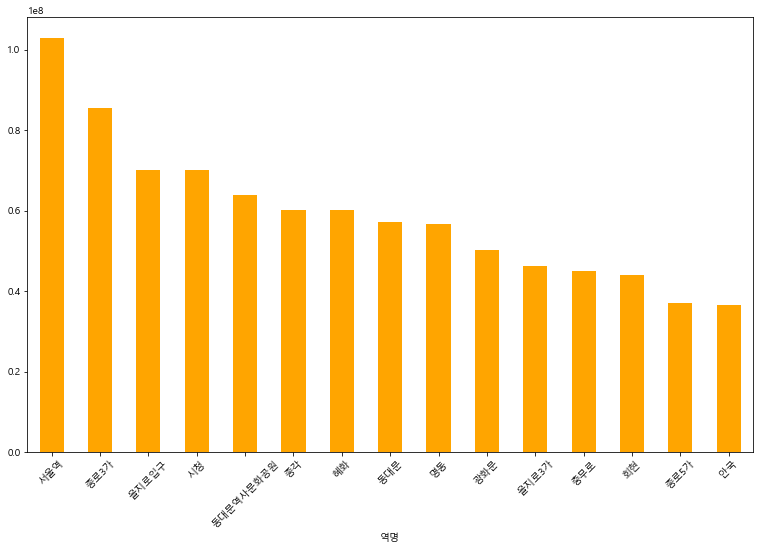

In [116]:
subway1819_1.plot(kind = 'bar',figsize = (13, 8),rot=45,color='orange',)

## 결론 및 향후보완사항

```
주거인구가 많은 지역구의 1인당 쓰레기 배출량이 많을 것이라 예상했으나 그렇지 않음. 

중구, 종로구의 주요 동을 확인해보니, 생활이동인구가 많은 지역이 포함됨. 
-> 1인 배출량이 높은 이유는 생활이동인구가 많은 상업용 건물이 많았기 때문. 

그러므로 재활용품 자동수거기는 이동인구가 많고 접근성이 좋은 중구,종로구의 top15 주변에 설치하는 것이 바람직함. 
특히 종로구에 있는 자동수거기는 교내에 교육용으로 설치되어 있기 때문에 외부인이 사용할 수 없으므로 현재 종로구에 설치된 자동수거기는 없다고 봐야함. 
```

- 코로나가 발생한 2020,2021 데이터를 확보하여 최신 데이터로 분석을 진행할 필요가 있음.
- 세부 행정구역별 데이터를 획득하지 못해 지역구 데이터를 이용하였지만 범위를 축소하여 구역별 특성에 맞춰 알맞은 장소에 자동수거기를 설치하는 것이 바람직함. 

### 참고 데이터

```
코로나 시대 또 다른 위기 '쓰레기 대란' < 기자수첩 < 오피니언 < 기사본문 - 내외뉴스통신 (nbnnews.co.kr)
http://www.nbnnews.co.kr/news/articleView.html?idxno=613236

[위클리오늘] 코로나19가 만든 ‘쓰레기 대란’…성인 57.5% “심각성 느껴” < 사회 < 기사본문 - 위클리오늘 (weeklytoday.com)
https://www.weeklytoday.com/news/articleView.html?idxno=348295

[데이터뉴스] 코로나로 늘어난 생활폐기물…작은 실천이 중요 | 서울시 - 내 손안에 서울 (seoul.go.kr)
https://mediahub.seoul.go.kr/archives/2000966

compas (광양시) 재활용품 자동수거기 설치를 위한 최적위치 선정
https://compas.lh.or.kr/subj/past/info?subjNo=SBJ_2107_002

서울시 주민등록인구 통계 
https://data.seoul.go.kr/dataList/419/S/2/datasetView.do

서울시 생활폐기물 발생량 및 처리현황 통계
https://data.seoul.go.kr/dataList/370/S/2/datasetView.do

서울시 용도지역 현황통계
https://data.seoul.go.kr/dataList/244/S/2/datasetView.do

분리수거 자판기 네프론 설치 위치 크롤링
https://www.superbin.co.kr/new/contents/location_list.php
    ```